<a href="https://colab.research.google.com/github/jaekyoungkim/floor_DL/blob/main/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_(ch7_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/youbeebee/deeplearning_from_scratch

Cloning into 'deeplearning_from_scratch'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 58.06 MiB | 36.72 MiB/s, done.
Resolving deltas: 100% (74/74), done.


# ch7. 합성곱 신경망 

In [ ]:
# 합성곱 계층과 풀링계층이 새롭게 등장
# affine- relu - affine-relu -.... - softmax
# conv - relu - pooling - conv - relu - pooling -... affine- relu- affine- softmax
# CNN에서는 패딩, 스트라이드 등 CNN고유의 용어가 등장
# 계층 사이에 3차원 데이터같이 입체적인 데이터가 흐른다는점에서 완전연결 신경망과 다름


In [ ]:
# 완전연결 계층의 문제점
# 완전연결 계층에서는 인접하는 계층의 뉴런이 모두 연결되고 출력의 수는 임의로 정할 수 있음
# 데이터의 형상이 무시되는 단점이 생김
# 3차원 데이터를 1차원으로 평탄화 해주면서 발생하는 문제
# CNN은 형상을 유지함, 이미지도 3차원 데이터로 입력받으며, 마찬가지로 다음 계층에도 3차원 데이터로 전달함
# CNN에서는 계층의 입출력 데이터를 특징맵이라고 함
# 합성곱 계층의 입력데이터를 입력 특징맵, 출력데이터를 출력 특징맵이라고 한다


In [ ]:
# 패딩 : 입력데이터 주변을 특정값으로 채우기 , 공간적 크기를 고정한채로 다음계층에 전달할수있게 해줌
# 스트라이드 : 필터를 적용하는 위치의 간격

In [ ]:
#  배치처리
#  풀링계층 : 풀링의 윈도우 크기 = 스트라이드크기
#  풀링의 특징 : 채널수가 변하지 않음, 입력의 변화에 영향을 적게 받음, 학습해야할 매개변수가 없다


In [3]:
# 합성곱 플링 계층 구현하기
# 4차원 배열
import numpy as np
x = np.random.rand(10,1, 28,28) #무작위로 데이터 생성
x.shape
x[0].shape
x[1].shape

(1, 28, 28)

In [4]:
x[0,0].shape

(28, 28)

In [5]:
# 4 차원 접근이 복잡할것 같지만, im2col트릭이 문제를 단순하게 만들어줌(image to column의 약자 이미지에서 행렬로라는 의미)
# 합성곱 연산을 곧이곧대로 구현하려면 for문을 겹겹이써야함
# numpy에 for문을 사용하면 성능이 떨어진다는 단점도 있음
# 입력데이터를 필터링 하기 좋게 전개하는 함수
# 3차원 데이터에 im2col를 적용하면 2차원 행렬로 바뀜

In [ ]:
#im2col(input_data, filter_h, filter_w,  stride=1, pad= 0)
# common/util.py참고
# input_data : (데이터수, 채널수, 높이, 너비)의 4차원배열로 이루어짐


In [6]:
import sys, os
sys.path.append("/content/deeplearning_from_scratch/")
from common.util import im2col

In [7]:
x1 = np.random.rand(1,3,7,7)  # 배치크기 1(데이터1개), 채널3개, 높이 너비= 7 x 7
col1= im2col(x1,5,5,stride=1,pad=0) # 두번쨰 차원의 원소는 75개(채널3, 필터크기5x5)
print(col1.shape)

(9, 75)


In [8]:
col1 # 3*3=9, 3*5*5=75

array([[2.23931721e-01, 2.50419918e-01, 1.10036661e-01, 9.66465039e-01,
        5.99934343e-01, 4.96488111e-01, 9.70485328e-01, 6.22639121e-01,
        6.41823295e-04, 2.52628590e-01, 6.47995612e-02, 6.13451878e-01,
        3.17308281e-01, 6.29205098e-01, 6.74424859e-01, 9.71586933e-01,
        7.25060723e-01, 6.01281918e-01, 2.52865363e-01, 3.38751024e-01,
        1.27112171e-02, 9.49780730e-01, 3.89230104e-01, 1.71918783e-01,
        8.33151123e-01, 9.17889078e-01, 5.52914682e-01, 2.31869345e-01,
        3.62503178e-01, 3.40423189e-01, 1.42976369e-01, 9.12469877e-01,
        7.93308626e-02, 7.30035911e-01, 3.57133170e-01, 8.85373295e-01,
        7.31330644e-01, 5.05775871e-01, 4.59809687e-01, 1.81127375e-01,
        3.91634591e-01, 8.73668772e-01, 9.39103221e-01, 5.17795207e-01,
        4.67631455e-02, 9.76765813e-01, 4.89711406e-01, 7.26308455e-01,
        3.74951167e-01, 5.32568493e-01, 6.64912087e-01, 2.28195476e-01,
        3.53732447e-01, 7.95247631e-01, 7.73474868e-01, 9.468276

In [9]:
x2=np.random.rand(10,3,7,7)
col2=im2col(x2,5,5,stride=1, pad=0)
print(col2.shape)  # 10*3*3 = 90, 3*5*5 = 75

(90, 75)


In [10]:
#im2col을 사용하여 합성곱 계층 구현
class Convolution:
  def __init__(self, W,b, stride=1, pad=0):
    self.W = W
    self.b = b
    self.stride = stride
    self.pad = pad
  
  def forward(self,x):
    FN, C, FH,FW = self.W.shape  # 필터의 형상, 4차원, FN필터개수, C채널, FH필터높이, FW필터너비
    N, C, H,W = x.shape
    out_h = int(1+ (H+2*self.pad - FH) / self.stride)
    out_w = int(1+ (W+2*self.pad - FW) / self.stride)

    col = im2col(x,FH,FW, self.stride, self.pad)
    col_W = self.W.shape(FN, -1).T
    out = np.dot(col, col_w) + self.b

    out = out.reshape(N,out_h, out_w, -1).transpose(0,3,1,2) # N, H, W, C -> N,C,H,W
    return out

In [ ]:
# 역전파에서는 IM2COL를 역으로 처리, col2im함수를 사용하면됨

In [12]:
# 풀링계층구현하기
# im2col를 사용해서 처리가능, but풀링의 경우, 채널쪽이 독립적이라는점이 합성곱 계층때와 다름
class Pooling:
  def __init__(self, pool_h, pool_w, stride=1, pad= 0):
    self.pool_h = pool_h
    self.pool_w = pool_w
    self.stride= stride
    self.pad = pad
  
  def forward(self,x):
    N,C,H,W = x.shape
    out_h = int(1+ (H-self.pool_h) / self.stride)
    out_w = int(1+ (W-self.pool_w) / self.stride)

    # 전개(1)
    col = im2col(x, self.pool_h, self.pool_w, self.stride,  self.pad)
    col = col.reshape(-1, self.pool_h * self.pool_w)

    # 최댓값(2)
    out = np.max(col, axis=1)  # max pooling

    # 성형(3)
    out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)
    return out

In [12]:
# 풀링 계층 구현은 다음과 같이 세단계로 진행됨
# 1. 입력데이터를 전개
# 2. 행별최댓값을 구함 ex. np.max(x, axis=1) : 입력 x의 1번째 차원의 축마다 최댓값을 구함
# 3. 적절한 모양으로 성형

In [16]:
from typing_extensions import OrderedDict
# CNN구현하기
# 이미지 > CONV < RELU > POOLING > AFFINE > RELU > AFFINE > SOFTMAX
# Input dim : 입력데이터의 차원(채널수, 높이, 너비)
# conv_param : 합성곱 계층의 하이퍼파라미터(딕셔너리)
# - filter_num : 필터수
# - filter_size : 필터크기
# - stride : 스트라이드
# - pad : 패딩
# - hidden_size : 은닉층의 뉴런수
# - output_size : 출력층의 뉴런수
# - weight_int_std : 초기화때의 가중치 표준편차

class SimpleConvNet:
  def __init__(self, input_dim = (1,28,28), conv_param = {"filter_num":30 , "filter_size": 5, "pad": 0 , "stride": 1}, hidden_size= 100, output_size= 10, weight_init_std = 0.01):
    filter_num = conv_param['filter_num']
    filter_size = conv_param['filter_size']
    filter_pad = conv_param['pad']
    filter_stride = conv_param['stride']
    input_size = input_dim[1]
    conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
    pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))
    self_params = {}
    self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
    self.params['b1'] = np.zeros(filter_num)
    self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
    self.params['b2'] = np.zeros(hidden_size)
    self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b3'] = np.zeros(output_size)
    # cnn을 구성하는 계층들을 생성하기
    self.layers = OrderedDict()
    self.layers['CONV1'] = Convolution(self.params['W1'], self.params['b1'], conv_param['stride'], conv_param['pad'])
    self.layers['Relu1'] = Relu()
    self.layers['Pool1'] = Pooling(pool_h = 2, pool_w = 2, stride= 2)
    self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
    self.layers['Relu2'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])
    self.lasy_layer = SoftmaxWithLoss()
  
  # predict method는 초기화때 layers에 추가한 계층을 맨 앞에서부터 차례로 forward메서드를 호출하며 그 결과를 다음 계층에 전달함
  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)
      return x

  def loss(self, x, t):  # x는 입력데이터, t는 정답 레이블
    y= self.predict(x)
    return self.last_layer.forward(y,t)
  
  def gradient(self,x,t):
    #순전파
    self.loss(x,t)

    #역전파
    dout = 1
    dout = self.last_layer.backward(dout)

    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    #결과저장
    grads = {}
    grads['W1'] = self.layers['Conv1'].dW
    grads['b1'] = self.layers['Conv1'].db
    grads['W2'] = self.layers['Affine1'].dW
    grads['b2'] = self.layers['Affine1'].db
    grads['W3'] = self.layers['Affine2'].dW
    grads['b3'] = self.layers['Affine2'].db
    
    return grads
# 매개변수의 기울기는 오차역전파법으로 구함
# 순전파와 역전파를 반복수행
# grads라는 딕셔너리 변수에 각 가중치 매개변수의 기울기를 저장함


In [22]:
# simpleconvnet을 mnist데이터셋으로 학습
# CH7 TRAIN_CONVET.PY참고
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append('/content/deeplearning_from_scratch/ch7.CNN')


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
train loss:0.019392444394995066
train loss:0.004135690340614343
train loss:0.009324616031519939
train loss:0.005744985830035898
train loss:0.003328392330623366
train loss:0.013066499643976154
train loss:0.0014176984612452792
train loss:0.006220194147391345
train loss:0.010332250803650229
train loss:0.00503429986504592
train loss:0.0036228165880035352
train loss:0.021936387409033253
train loss:0.0021173853119107046
train loss:0.0016195963101028584
train loss:0.001988216000458889
train loss:0.013662284671417693
train loss:0.008604104264543687
train loss:0.004307149009277844
train loss:0.0026697955690706244
train loss:0.0018901915509700726
train loss:0.0058089991624926725
train loss:0.004438599550405119
train loss:0.003709305450591388
train loss:0.002513922819429707
train loss:0.014919442697811917
train loss:0.00613640114963925
train loss:0.0009033960041952912
train loss:0.009678617948239251
train loss:0.0005986182924849371
train loss:0.0024998861124454

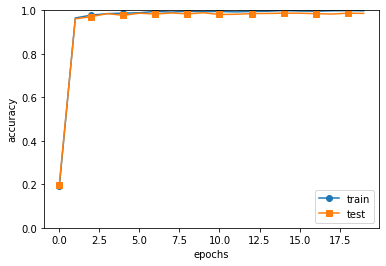

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


In [24]:
# cnn시각화하기
# 합성곱 계층은 입력으로 받은 이미지 데이터에서 무엇을 보고있는지 확인
# 1번째 층의 가중치 시각화하기
# 1번쨰 층의 합성곱 계층의 가중치는 그 형상이 (30,1,5,5) : 필터30개, 채널 1개, 5x5, 회색조1개채널
# visualize_filter.py확인
# 학습전 필터는 무작위로 초기화되고있어 흑백의정도에 규칙성이 없음
# 학습을 다 마친 필터는 규칙성있는 이미지가 됨
# 규치성있는 필터 : 에지(색상이 바뀐 경계선)와 블롭(국소적으로 덩어리진 영역)
# 합성곱 계층의 필터는 에지나 블롭등의 원시적인 정보를 추출


In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])



In [25]:
# 층 깊이에 따른 추출정보 변화
# 계층이 깊어질수록 추출되는 정보는 더 추상화 됨
# Ex) AlexNet : 합성곱 게층과 풀링 계층을 여러겹 쌓고 마지막으로 완전연결 계층을 거쳐 결과를 출력하는 구조
# 단순한 모양에서 고급정보로 변환됨, 사물의 의미를 이해하도록 변화함

# ch8. 딥러닝 

In [29]:
# VGG NET
# 가중치 초깃값으로 HE초깃값을 사용
# 가중치 매개변수 갱신에는 Adam을 사용
# 3x3의 작은 필터를 사용한 합성곱 계층
# 활성화 함수는 relu
# ch8. deep_convnet.py / ch8. train_deepnet.py 참고
# 학습된 가중치 매개변수를 deep_conv_net_params.pkl에 저장함

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *


class DeepConvNet:
    """정확도 99% 이상의 고정밀 합성곱 신경망

    네트워크 구성은 아래와 같음
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        conv - relu - conv- relu - pool -
        affine - relu - dropout - affine - dropout - softmax
    """
    def __init__(self, input_dim=(1, 28, 28),
                 conv_param_1 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_2 = {'filter_num':16, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_3 = {'filter_num':32, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_4 = {'filter_num':32, 'filter_size':3, 'pad':2, 'stride':1},
                 conv_param_5 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 conv_param_6 = {'filter_num':64, 'filter_size':3, 'pad':1, 'stride':1},
                 hidden_size=50, output_size=10):
        # 가중치 초기화===========
        # 각 층의 뉴런 하나당 앞 층의 몇 개 뉴런과 연결되는가（TODO: 자동 계산되게 바꿀 것）
        pre_node_nums = np.array([1*3*3, 16*3*3, 16*3*3, 32*3*3, 32*3*3, 64*3*3, 64*4*4, hidden_size])
        wight_init_scales = np.sqrt(2.0 / pre_node_nums)  # ReLU를 사용할 때의 권장 초깃값
        
        self.params = {}
        pre_channel_num = input_dim[0]
        for idx, conv_param in enumerate([conv_param_1, conv_param_2, conv_param_3, conv_param_4, conv_param_5, conv_param_6]):
            self.params['W' + str(idx+1)] = wight_init_scales[idx] * np.random.randn(conv_param['filter_num'], pre_channel_num, conv_param['filter_size'], conv_param['filter_size'])
            self.params['b' + str(idx+1)] = np.zeros(conv_param['filter_num'])
            pre_channel_num = conv_param['filter_num']
        self.params['W7'] = wight_init_scales[6] * np.random.randn(64*4*4, hidden_size)
        self.params['b7'] = np.zeros(hidden_size)
        self.params['W8'] = wight_init_scales[7] * np.random.randn(hidden_size, output_size)
        self.params['b8'] = np.zeros(output_size)

        # 계층 생성===========
        self.layers = []
        self.layers.append(Convolution(self.params['W1'], self.params['b1'], 
                           conv_param_1['stride'], conv_param_1['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W2'], self.params['b2'], 
                           conv_param_2['stride'], conv_param_2['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Convolution(self.params['W3'], self.params['b3'], 
                           conv_param_3['stride'], conv_param_3['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W4'], self.params['b4'],
                           conv_param_4['stride'], conv_param_4['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Convolution(self.params['W5'], self.params['b5'],
                           conv_param_5['stride'], conv_param_5['pad']))
        self.layers.append(Relu())
        self.layers.append(Convolution(self.params['W6'], self.params['b6'],
                           conv_param_6['stride'], conv_param_6['pad']))
        self.layers.append(Relu())
        self.layers.append(Pooling(pool_h=2, pool_w=2, stride=2))
        self.layers.append(Affine(self.params['W7'], self.params['b7']))
        self.layers.append(Relu())
        self.layers.append(Dropout(0.5))
        self.layers.append(Affine(self.params['W8'], self.params['b8']))
        self.layers.append(Dropout(0.5))
        
        self.last_layer = SoftmaxWithLoss()

    def predict(self, x, train_flg=False):
        for layer in self.layers:
            if isinstance(layer, Dropout):
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x, train_flg=True)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        acc = 0.0

        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx, train_flg=False)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt)

        return acc / x.shape[0]

    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        tmp_layers = self.layers.copy()
        tmp_layers.reverse()
        for layer in tmp_layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            grads['W' + str(i+1)] = self.layers[layer_idx].dW
            grads['b' + str(i+1)] = self.layers[layer_idx].db

        return grads

    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, layer_idx in enumerate((0, 2, 5, 7, 10, 12, 15, 18)):
            self.layers[layer_idx].W = self.params['W' + str(i+1)]
            self.layers[layer_idx].b = self.params['b' + str(i+1)]


In [32]:
# what is the class of this image ? 
# mnist : 대부분은 cnn을 기초로한 기법들
# 현재 1위 99.79% : 합성곱 계층 2개, 완전연결 게층 2개정도
# 비교적 단순한 과제라서 신경망의 표현력을 극한까지 높일 필요가 없기때문임
# 앙상블학습, 학습률감소, 데이터 확장등을 통해 정확도 향상에 공헌

In [33]:
# 데이터 확장(Data Augmentation)
# 회전 + 이동 + crop + flip 

In [34]:
# 신경망의 층을 깊게 할때의 이점
# - 매개변수 수가 줄어든다 (ex. 3x3합성곱 연산을 3회 반복하면 27개 매개변수, 같은 크기의 영역을 1회의 합성곱 연산으로 보기위해서는 49개 매개변수필요)
# - 학습의 효율성 증가 : 층을 깊게하여 학습데이터의 양을 줄여 학습을 고속으로 수행할수있음

In [35]:
# 이미지넷 (imageNet)
# 100만장이 넘는 이미지를 담고있는 데이터셋
# 다양한 종류의 이미지를 포함하며 각 이미지에는 레이블이 붙어있음
# 분류 부문 : 1000개의 클래스를 제대로 분류하는지를 겨룸

In [36]:
# 1. VGG NET
# 합성곱 계층과 풀링게층으로 구성되는 기본적인 CNN
# 비중있는 층을 모두 16층 (혹은 19층)으로 심화한게 특징
# 3X3작은 필터를 사용합 합성곱 게층을 연속으로 거침
# 구성이 간단하며, 응용하기 좋음

In [37]:
# 2. GoogleNet
# 세로방향 깊이 뿐만 아니라 가로방향도 깊다는 특징을 가짐
# 인셉션구조를 띔 : 가로 방향의 폭이 존재함
# 1x1 3x3 5x5 합성곱, 3x3최대풀링 -> 필터결합
# 인셉션 구조를 하나의 빌딩블록(구성요소)으로 사용하는것이 googlenet의 특징
# 1x1 합성곱 게층을 많은곳에서 사용함 : 채널쪽으로 크기를 줄이는것 , 매개변수 제거와 고속처리에 기여

In [38]:
# 3. ResNet
# 마이크로소프트 팀이 개발한 네트워크
# 층을 깊게 하는것이 성능향상에 중요하지만, 층이 지나치게 잎으면 학습이 잘되지않고, 오히려 성능이 떨어지는 경우도많음
# 그런문제를 해결하기 위해서 skip connection을 도입
# 층의 깊이에 비례해 성능을 향상 시킬 수 있게 한 핵심임
# skip connection : 입력데이터를 합성공 계층을 건너뛰어 출력에 바로 더하는 구조
# 역전파때 스킵연결이 신호 감쇠를 막아줌, 입력데이터를 그대로 흘리는 것으로 역전파때도 상류의 기울기를 그대로 하류로 보냄
# 합성곱 계층을 2개 층마다 건너뛰면서 층을 깊게함


In [40]:
# 4. 딥러닝 고속화 
# 대부분 딥러닝 프레임워크는 gpu를 활용
# 학습을 복수의 gpu와 여러 기기로 분산수행함
# gpu를 활용한 고속화 : 그래픽 처리뿐 아니라 범용 수치연산에도 이용됨
# gpu 컴퓨팅 : gpu로 범용수치 연산을 수행하는것
# cuda활용 
# cuDNN : Cuda위에서 동작하는 라이브러리, 딥러닝에 최적화된 함수등이 구현됨


In [41]:
# 5. 분산학습
# gpu로 딥러닝 연산을 가속할수있지만 수평확장의 필요성 대두됨
# gpu와 컴퓨터를 활용한 분산학습을 지원한 딥러닝 프레임워크들이 있음 ex. 텐서플로, cntk
# 계산을 어떻게 분산시키느냐는 몹시 어려운문제


In [42]:
# 6. 연산 정밀도와 비트 줄이기
# 딥러닝 높은 수치 정밀도를 요구하진 않음
# 신경망을 흐르는 데이터를 퇴화시켜도 출력에 주는 영향은 적음
# 32비트 단정밀도, 64비트 배정밀도, 16비트 반정밀도만 사용해도 학습에 문제가 없음
# 딥러닝을 고속화하기 위해 비트를 줄이는 기술은 앞으로 주시해야할 분야
# 딥러닝을 임베디드용으로 이용할때 중요한 주제


In [43]:
########## 딥러닝의 활용 ###########


In [44]:
# 1. 사물검출(Object detection)
# R-CNN(Regions with CNN) : 후보영역 추출-CNN특징계산-영역분류 / Selective search 기법사용
# faster R-CNN : 후보영역 추출까지 CNN으로 처리하는 기법, 모든일을 하나의  CNN에서 처리하기 때문에 매우 빠름

In [ ]:
# 2. 분할(Segmentation)
# 픽셀단위로 객체마다 채색된 지도 데이터를 사용해 학습함
# FCN(Fully Convolutional Network) : 합성곱 계층만으로 구성된 네트워크

In [45]:
# 3. 이미지 캡션생성
# 컴퓨터 비전과 자연어를 융합한 분야
# NIC (Neural image caption): DEEP CNN+ RNN으로 구성됨
# CF. RNN: 순환적 관계를 갖는 신경망으로 자연어나 시계열 데이터 등의 연속된 데이터를 다룰때 많이 사용됨